In [1]:
import tvpp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dof = 6
ts = 0.016
vmax = np.zeros(dof) # rad/s
DEG2RAD = np.pi / 180.0
vmax[0] = 262.5 * DEG2RAD
vmax[1] = 240.0 * DEG2RAD
vmax[2] = 300.0 * DEG2RAD
vmax[3] = 300.0 * DEG2RAD
vmax[4] = 300.0 * DEG2RAD
vmax[5] = 480.0 * DEG2RAD

amax = np.zeros(dof) # rad/s^2
amax[0] = 1400.0 * DEG2RAD
amax[1] = 900.0 * DEG2RAD
amax[2] = 1300.0 * DEG2RAD
amax[3] = 1800.0 * DEG2RAD
amax[4] = 1600.0 * DEG2RAD
amax[5] = 5000.0 * DEG2RAD

_tvpp = tvpp.TrapezoidalVelocityProfilePlanner(dof, ts, vmax, amax)

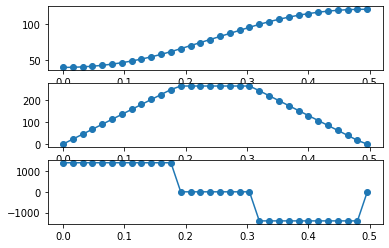

In [12]:
# example 1.1: single-axis single-motion TVPP
q0 = 40.0 * DEG2RAD
qn = 120.0 * DEG2RAD

tdata, qdata, vdata, adata = _tvpp.getSingleAxisSingleMotionProfile(0, q0, qn)
qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tdata, qdata, '-o')
plt.subplot(3, 1, 2)
plt.plot(tdata, vdata, '-o')
plt.subplot(3, 1, 3)
plt.plot(tdata, adata, '-o')
plt.show()

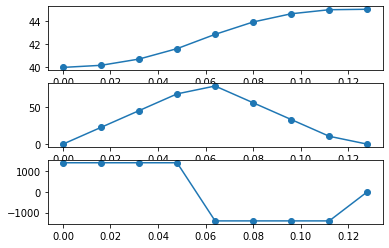

In [13]:
# example 1.2: single-axis single-motion TVPP without constant velocity phase
q0 = 40.0 * DEG2RAD
qn = 45.0 * DEG2RAD

tdata, qdata, vdata, adata = _tvpp.getSingleAxisSingleMotionProfile(0, q0, qn)
qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tdata, qdata, '-o')
plt.subplot(3, 1, 2)
plt.plot(tdata, vdata, '-o')
plt.subplot(3, 1, 3)
plt.plot(tdata, adata, '-o')
plt.show()

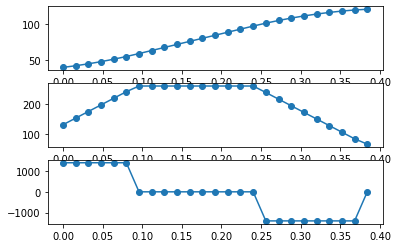

In [14]:
# example 1.3: single-axis single-motion TVPP with non-zero v0 and vn
q0 = 40.0 * DEG2RAD
qn = 120.0 * DEG2RAD
#qn = 45.0 * DEG2RAD
v0 =  vmax[0] / 2.0
vn =  vmax[0] / 4.0

tdata, qdata, vdata, adata = _tvpp.getSingleAxisSingleMotionProfile(0, q0, qn, v0, vn)
qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tdata, qdata, '-o')
plt.subplot(3, 1, 2)
plt.plot(tdata, vdata, '-o')
plt.subplot(3, 1, 3)
plt.plot(tdata, adata, '-o')
plt.show()

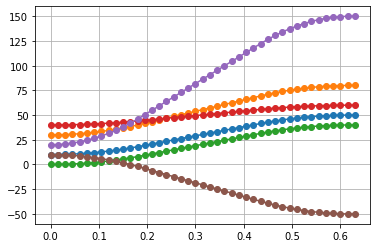

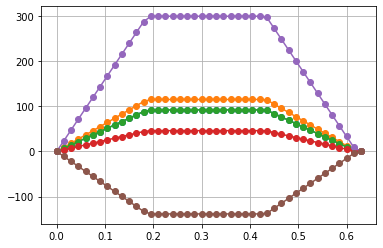

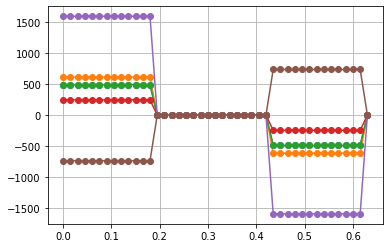

In [6]:
# example 2.1: multi-axis single-motion TVPP
q0 = [0, 0, 0, 0, 0, 0]
qn = [0, 0, 0, 0, 0, 0]
q0[0] = 10.0 * DEG2RAD
q0[1] = 30.0 * DEG2RAD
q0[2] = 0.0 * DEG2RAD
q0[3] = 40.0 * DEG2RAD
q0[4] = 20.0 * DEG2RAD
q0[5] = 10.0 * DEG2RAD

qn[0] = 50.0 * DEG2RAD
qn[1] = 80.0 * DEG2RAD
qn[2] = 40.0 * DEG2RAD
qn[3] = 60.0 * DEG2RAD
qn[4] = 150.0 * DEG2RAD
qn[5] = -50.0 * DEG2RAD

tdata, qdata, vdata, adata = _tvpp.getMultiAxisSingleMotionProfile(q0, qn)

qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure(0)
plt.grid()
for i in range(dof):
    plt.plot(tdata, qdata[i], '-o')

plt.figure(1)
plt.grid()
for i in range(dof):
    plt.plot(tdata, vdata[i], '-o')

plt.figure(2)
plt.grid()
for i in range(dof):
    plt.plot(tdata, adata[i], '-o')

[ 50.  80.  40.  60. 150. -50.]


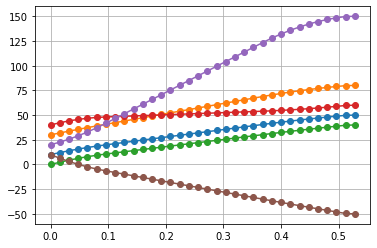

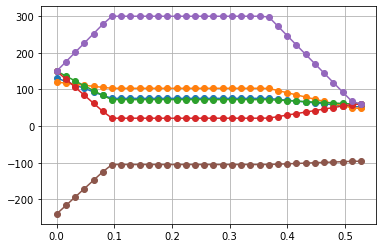

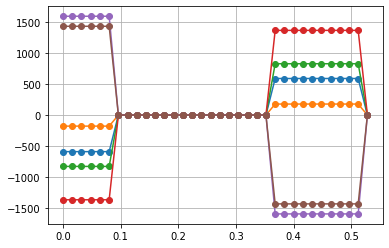

In [15]:
# example 2.2: multi-axis single-motion TVPP with non-zero v0 and vn
q0 = [0, 0, 0, 0, 0, 0]
qn = [0, 0, 0, 0, 0, 0]
q0[0] = 10.0 * DEG2RAD
q0[1] = 30.0 * DEG2RAD
q0[2] = 0.0 * DEG2RAD
q0[3] = 40.0 * DEG2RAD
q0[4] = 20.0 * DEG2RAD
q0[5] = 10.0 * DEG2RAD

qn[0] = 50.0 * DEG2RAD
qn[1] = 80.0 * DEG2RAD
qn[2] = 40.0 * DEG2RAD
qn[3] = 60.0 * DEG2RAD
qn[4] = 150.0 * DEG2RAD
qn[5] = -50.0 * DEG2RAD

v0 = [0, 0, 0, 0, 0, 0]
v0[0] = np.sign(qn[0] - q0[0]) * vmax[0] / 2.0
v0[1] = np.sign(qn[1] - q0[1]) * vmax[1] / 2.0
v0[2] = np.sign(qn[2] - q0[2]) * vmax[2] / 2.0
v0[3] = np.sign(qn[3] - q0[3]) * vmax[3] / 2.0
v0[4] = np.sign(qn[4] - q0[4]) * vmax[4] / 2.0
v0[5] = np.sign(qn[5] - q0[5]) * vmax[5] / 2.0

vn = [0, 0, 0, 0, 0, 0]
vn[0] = np.sign(qn[0] - q0[0]) * vmax[0] / 5.0
vn[1] = np.sign(qn[1] - q0[1]) * vmax[1] / 5.0
vn[2] = np.sign(qn[2] - q0[2]) * vmax[2] / 5.0
vn[3] = np.sign(qn[3] - q0[3]) * vmax[3] / 5.0
vn[4] = np.sign(qn[4] - q0[4]) * vmax[4] / 5.0
vn[5] = np.sign(qn[5] - q0[5]) * vmax[5] / 5.0

tdata, qdata, vdata, adata = _tvpp.getMultiAxisSingleMotionProfile(q0, qn, v0, vn)

qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

print(qdata[:, -1])

plt.figure(0)
plt.grid()
for i in range(dof):
    plt.plot(tdata, qdata[i], '-o')

plt.figure(1)
plt.grid()
for i in range(dof):
    plt.plot(tdata, vdata[i], '-o')

plt.figure(2)
plt.grid()
for i in range(dof):
    plt.plot(tdata, adata[i], '-o')

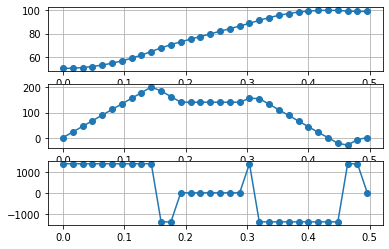

In [16]:
# example 3.1: single-axis multi-motion TVPP
q0 = 50.0 * DEG2RAD
q1 = 80.0 * DEG2RAD
q2 = 100.0 * DEG2RAD
qn = 99.0 * DEG2RAD

waypoints = [q0, q1, q2, qn]
tdata, qdata, vdata, adata = _tvpp.getSingleAxisMultiMotionProfile(0, waypoints, tvpp.BlendingType.addingblend)
qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tdata, qdata, '-o')
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(tdata, vdata, '-o')
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(tdata, adata, '-o')
plt.grid()
plt.show()

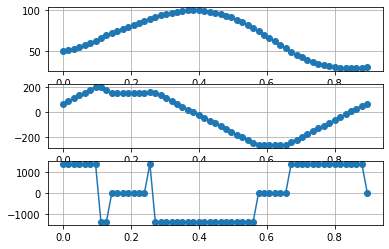

In [17]:
# example 3.2: single-axis multi-motion TVPP with non-zero v0 and vn
q0 = 50.0 * DEG2RAD
q1 = 80.0 * DEG2RAD
q2 = 100.0 * DEG2RAD
qn = 30.0 * DEG2RAD
v0 = vmax[0] / 4.0
vn = vmax[0] / 4.0

waypoints = [q0, q1, q2, qn]
tdata, qdata, vdata, adata = _tvpp.getSingleAxisMultiMotionProfile(0, waypoints, tvpp.BlendingType.addingblend, v0, vn)
qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tdata, qdata, '-o')
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(tdata, vdata, '-o')
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(tdata, adata, '-o')
plt.grid()
plt.show()

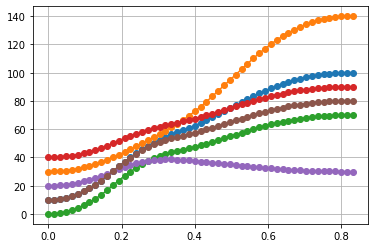

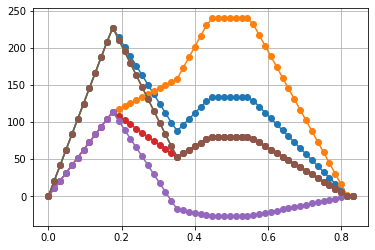

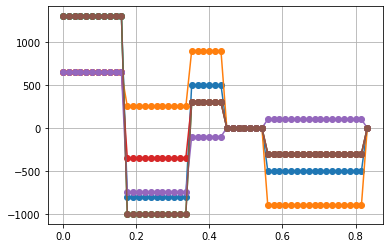

In [19]:
# example 4.1: multi-axis multi-motion TVPP
q0 = [0, 0, 0, 0, 0, 0]
q0[0] = 10.0 * DEG2RAD
q0[1] = 30.0 * DEG2RAD
q0[2] = 0.0 * DEG2RAD
q0[3] = 40.0 * DEG2RAD
q0[4] = 20.0 * DEG2RAD
q0[5] = 10.0 * DEG2RAD

q1 = [0, 0, 0, 0, 0, 0]
q1[0] = 50.0 * DEG2RAD
q1[1] = 50.0 * DEG2RAD
q1[2] = 40.0 * DEG2RAD
q1[3] = 60.0 * DEG2RAD
q1[4] = 40.0 * DEG2RAD
q1[5] = 50.0 * DEG2RAD

qn = [0, 0, 0, 0, 0, 0]
qn[0] = 100.0 * DEG2RAD
qn[1] = 140.0 * DEG2RAD
qn[2] = 70.0 * DEG2RAD
qn[3] = 90.0 * DEG2RAD
qn[4] = 30.0 * DEG2RAD
qn[5] = 80.0 * DEG2RAD

v0 = [0, 0, 0, 0, 0, 0]
v0[0] = np.sign(q1[0] - q0[0]) * vmax[0] / 2.0
v0[1] = np.sign(q1[1] - q0[1]) * vmax[1] / 2.0
v0[2] = np.sign(q1[2] - q0[2]) * vmax[2] / 2.0
v0[3] = np.sign(q1[3] - q0[3]) * vmax[3] / 2.0
v0[4] = np.sign(q1[4] - q0[4]) * vmax[4] / 2.0
v0[5] = np.sign(q1[5] - q0[5]) * vmax[5] / 2.0

waypoints = [q0, q1, qn]
tdata, qdata, vdata, adata = _tvpp.getMultiAxisMultiMotionProfile(waypoints, tvpp.BlendingType.addingblend)
for i in range(len(qdata)):
    qdata[i] = np.array(qdata[i]) / DEG2RAD
    vdata[i] = np.array(vdata[i]) / DEG2RAD
    adata[i] = np.array(adata[i]) / DEG2RAD

plt.figure(0)
plt.grid()
for i in range(dof):
    plt.plot(tdata, qdata[i], '-o')

plt.figure(1)
plt.grid()
for i in range(dof):
    plt.plot(tdata, vdata[i], '-o')

plt.figure(2)
plt.grid()
for i in range(dof):
    plt.plot(tdata, adata[i], '-o')

plt.show()